In [1075]:
import yfinance as yf
import segment
import fit
from scipy.stats import linregress, iqr
import numpy as np
import pandas as pd
import fuzzylogic
import zadeh
from matplotlib import pyplot as plt
from fuzzylogic.functions import R, S, alpha, triangular, bounded_linear, trapezoid
from fuzzylogic.classes import Domain
from fuzzylogic.hedges import plus, minus, very
import segment
import wrappers
import fit
from matplotlib.pyplot import figure

## Fuzzy Slope

In [226]:
slope = Domain("slope", -90, 90, res=0.01)

In [227]:
slope.quickly_decreasing = S(-90+11.25, -90+32.5)
slope.decreasing = triangular(-77.5, -35)
slope.slowly_decreasing = triangular(-55, -12.5)
slope.constant = triangular(-32.5, 32.5)
slope.slowly_increasing = triangular(12.5, 55)
slope.increasing = triangular(35, 77.5)
slope.quickly_increasing = R(90-32.5, 90-11.25)

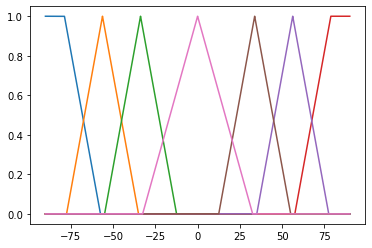

In [44]:
slope.quickly_decreasing.plot()
slope.decreasing.plot()
slope.slowly_decreasing.plot()
slope.quickly_increasing.plot()
slope.increasing.plot()
slope.slowly_increasing.plot()
slope.constant.plot()

In [45]:
series = [i for i in range(90)]
length = len(series)

In [730]:
def fuzzy_slope(series):
    
    total_sum = {'quickly decreasing' : [],
                 'decreasing' : [],
                 'slowly decreasing' : [],
                 'constant' : [],
                 'slowly increasing' : [],
                 'increasing' : [],
                 'quickly increasing' : []}
    
    indexes = {'quickly decreasing' : [],
               'decreasing' : [],
               'slowly decreasing' : [],
               'constant' : [],
               'slowly increasing' : [],
               'increasing' : [],
               'quickly increasing' : []}

    for index, i in enumerate(series):
        total_sum['quickly decreasing'].append(round(slope.quickly_decreasing(i), 2))
        if round(slope.quickly_decreasing(i), 2) > 0:
            indexes['quickly decreasing'].append(index)
            
        total_sum['decreasing'].append(round(slope.decreasing(i), 2))
        if round(slope.decreasing(i), 2) > 0:
            indexes['decreasing'].append(index)
        
        total_sum['slowly decreasing'].append(round(slope.slowly_decreasing(i), 2))
        if round(slope.slowly_decreasing(i), 2) > 0:
            indexes['slowly decreasing'].append(index)
        
        total_sum['constant'].append(round(slope.constant(i), 2))
        if round(slope.constant(i), 2) > 0:
            indexes['constant'].append(index)
            
        total_sum['slowly increasing'].append(round(slope.slowly_increasing(i), 2))
        if round(slope.slowly_increasing(i), 2) > 0:
            indexes['slowly increasing'].append(index)
            
        total_sum['increasing'].append(round(slope.increasing(i), 2))
        if round(slope.increasing(i), 2) > 0:
            indexes['increasing'].append(index)
            
        total_sum['quickly increasing'].append(round(slope.quickly_increasing(i), 2))
        if round(slope.quickly_increasing(i), 2) > 0:
            indexes['quickly increasing'].append(index)
        
    number_of_segments = len(series)
    
    # calculate truth value
    n = 0
    
    for i in total_sum.get(max(total_sum, key = lambda x: sum(total_sum.get(x)))):
        if i != 0:
            n += i
            
    # calculate quantifier
    q = 0
    
    for i in total_sum.get(max(total_sum, key = lambda x: sum(total_sum.get(x)))):
        if i != 0:
            q += 1
    
    
    
    value = round((q / len(series)), 2)
    
    quantifier_value = quantifier(value)
    
    return max(total_sum, key = lambda x: sum(total_sum.get(x))), round(sum(total_sum.get(max(total_sum, key = lambda x: sum(total_sum.get(x))))), 2), round((n/number_of_segments), 2), indexes.get(max(total_sum, key = lambda x: sum(total_sum.get(x)))), quantifier_value

In [ ]:
fuzzy_slope()

## Fuzzy Duration

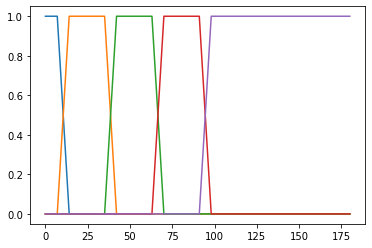

In [47]:
duration = Domain("duration", 0, 180, res=0.01)
duration.very_short = S(0+7, 0+14)
duration.short = trapezoid(7, 14, 35, 42)
duration.medium = trapezoid(35, 42, 42+21, 42+28)
duration.long = trapezoid(63, 70, 70+21, 70+28)
duration.very_long = R(91, 98)
duration.very_short.plot()
duration.short.plot()
duration.medium.plot()
duration.long.plot()
duration.very_long.plot()

# segment length / sum of total length

In [412]:
def fuzzy_duration(series):
    
    total_sum = {'very short' : [],
                 'short' : [],
                 'medium' : [],
                 'long' : [],
                 'very long' : []}

    for i in series:
        total_sum['very short'].append(round(duration.very_short(i), 2))
        total_sum['short'].append(round(duration.short(i), 2))
        total_sum['medium'].append(round(duration.medium(i), 2))
        total_sum['long'].append(round(duration.long(i), 2))
        total_sum['very long'].append(round(duration.very_long(i), 2))
        
        
    number_of_segments = len(series)
    
    n = 0
    
    for i in total_sum.get(max(total_sum, key = lambda x: sum(total_sum.get(x)))):
        if i != 0:
            n += i
    
    return max(total_sum, key = lambda x: sum(total_sum.get(x))), sum(total_sum.get(max(total_sum, key = lambda x: sum(total_sum.get(x)))))

## Fuzzy Variability

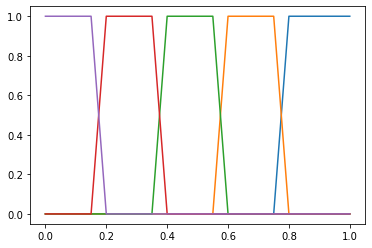

In [416]:
variability = Domain("variability", 0, 1, res=0.01)
variability.very_high = R(0.75, 4/5)
variability.high = trapezoid(0.55, 3/5, 0.75, 4/5)
variability.medium = trapezoid(0.35, 2/5, 0.55, 3/5)
variability.low = trapezoid(0.15, 1/5, 0.35, 2/5)
variability.very_low = S(0.15, 1/5)

#plot
variability.very_high.plot()
variability.high.plot()
variability.medium.plot()
variability.low.plot()
variability.very_low.plot()

In [414]:
def fuzzy_variability(series):
    
    total_sum = {'very high' : [],
                 'high' : [],
                 'medium' : [],
                 'low' : [],
                 'very low' : []}
    
    
    for i in series:
        total_sum['very high'].append(round(variability.very_high(i), 2))
        total_sum['high'].append(round(variability.high(i), 2))
        total_sum['medium'].append(round(variability.medium(i), 2))
        total_sum['low'].append(round(variability.low(i), 2))
        total_sum['very low'].append(round(variability.very_low(i), 2))
        
        
    number_of_segments = len(series)
    
    n = 0
    
    for i in total_sum.get(max(total_sum, key = lambda x: sum(total_sum.get(x)))):
        if i != 0:
            n += i
    
    return max(total_sum, key = lambda x: sum(total_sum.get(x))), sum(total_sum.get(max(total_sum, key = lambda x: sum(total_sum.get(x)))))
    
    


In [764]:
def quantifier(value):
    
    quantifier = {
    'almost all of ' : 0,
    'most of ' : 0,
    'at least a half of ' : 0,
    'at least a third of ' : 0,
    'some of ' : 0,
    'none of ' : 0
    }

    if value >= 0.85:
        quantifier['almost all of '] += 1
    if value >= 0.7:
        quantifier['most of '] += 1
    if value >= 0.5:
        quantifier['at least a half of '] += 1
    if value >= 0.3:
        quantifier['at least a third of '] += 1
    if value > 0:
        quantifier['some of '] += 1
    if value == 0:
        quantifier['none of '] += 1

    quantifier_value = max(quantifier, key = quantifier.get)

    return quantifier_value

In [52]:
def summary_L1(series, fuzzy_func, quantifier):
    
    elementA0 = '{{quantifier_related_to_first_variable}}'
    elementA1 = 'trends are '
    elementA2 = '{{slope_variable}}'
    elementA3 = '.'
    
    fuzzy = fuzzy_func(series)[2]
    elementA0 = quantifier(fuzzy)
    elementA2 = fuzzy_func(series)[0]
    
    sentence = elementA0 + elementA1 + elementA2 + elementA3
    
    return sentence

In [1061]:
def preprocessing(stock_name='TSLA', period='max'):
    
    '''
    1. Input stock name.
    2. Return historical prices and currency of stock.
    '''

    # get stock data
    hist = yf.Ticker(stock_name)

    # get historical market data
    df = hist.history(period)
    
    currency = hist.info['currency']

    series = list(round(df['Open'], 4))

    return series, currency, df

In [54]:
def suffix(d):
    return 'th' if 11<=d<=13 else {1:'st',2:'nd',3:'rd'}.get(d%10, 'th')

def custom_strftime(t):
    
    format = '%B {S} %Y'
    string_date = t.strftime(format).replace('{S}', str(t.day) + suffix(t.day))
    
    return string_date

In [55]:
def max_price(df):
    
    max_value = 0 
    index = None
    

    for i, value in enumerate(df['Open']):
        if value > max_value:
            max_value = round(value, 2)
            index = df.Open.index[i].date()
            string_date = custom_strftime(index)

    return max_value, string_date

In [56]:
def min_price(df):
    
    min_value = 999999 
    index = 0

    for i, value in enumerate(df['Open']):
        if value < min_value:
            min_value = round(value, 2)
            index = df.Open.index[i].date()
            string_date = custom_strftime(index)

    return min_value, string_date

In [57]:
def min_date(df):
    
    date = custom_strftime(df.index.min())

    return date

In [58]:
def max_date(df):
    
    date = custom_strftime(df.index.max())

    return date

In [59]:
def summary_price(df):
    
    opening = 'During the time period of '
    mindate = min_date(df)
    maxdate = max_date(df)
    glue = ' and '
    date_element = ' the stock price peaked at '
    max_value = max_price(df)[0]
    glue_2 = ' on '
    date_1 = max_price(df)[1]
    glue_3 = ' and hit its lowest value of '
    min_value = min_price(df)[0]
    glue_4 = ' on '
    date_2 = min_price(df)[1]
    eos = '.'
    
    sentence0 = opening + mindate + glue + maxdate + date_element + str(max_value) + glue_2 + date_1 + glue_3 \
                + str(min_value) + glue_4 + date_2 + eos
    
    return sentence0

In [60]:
data = yf.Ticker('TSLA')
tickerDF = data.history(interval = '1d', start = '2020-01-01', end = '2021-01-01')
tickerDF.index.min()

Timestamp('2020-01-02 00:00:00')

In [61]:
summary_price(tickerDF)

'During the time period of January 2nd 2020 and December 31st 2020 the stock price peaked at 699.99 on December 31st 2020 and hit its lowest value of 74.94 on March 19th 2020.'

## Segmentation

In [18]:
start_date = '2010-06-30'
end_date = '2021-06-17'
max_error = 100

def segment_detection(df, start_date, end_date, max_error):
    
    start = df.index.get_loc(start_date)
    end = df.index.get_loc(end_date)
    data = list(round(df.Close, 2))
    segments = segment.bottomupsegment(data[start:end], fit.interpolate, fit.sumsquared_error, max_error)
    
    return segments, data[start:end]

In [21]:
df = preprocessing()[2]

In [67]:
segments, data = segment_detection(df, start_date, end_date, max_error)

/Users/christopherkindl/working/nlp-dissertation/06_time_series_analysis/wrappers.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p,residuals,rank,s) = lstsq(A,y)


168


## Evaluation functions

**Level 1**

In [652]:
len(segments[0])

117

In [486]:
def calc_duration(segments, filtering):
    '''
    1. Input segment series.
    2. Return segment-specific duration.
    '''
    duration_series = []
    for i in range(len(segments)):
        if i in filtering:
            start, _, end, _ = segments[i]
            length = end-start
            duration_series.append(length)
            
    return duration_series

In [466]:
def calc_slope(segments):
    '''
    1. Input segment series.
    2. Return angle of slope.
    '''
    slope_series = []
    for segment in segments:
        x0, y0, x1, y1 = segment
        angle = round((np.rad2deg(np.arctan2(y1 - y0, x1 - x0))), 2)
        slope_series.append(angle)
        
    return slope_series

In [490]:
def calc_variability(data, segments, filtering):
    '''
    1. Input value range as array.
    2. Return interquartile range.
    '''
    variability_series = []

    for i in range(len(segments)):
        if i in filtering:
            start, _, end, _ = segments[i]
            x = np.array(data[start:end+1])
            #segment_iqr = round(iqr(x), 4)
            segment_sd = np.std(x)
            segment_avg = np.average(x)
            coefficient_of_variance = round((segment_sd / segment_avg), 2)
            variability_series.append(coefficient_of_variance)
            
    return variability_series

**Level 2**

In [502]:
def calc_duration_L2(segments, filtering):
    '''
    1. Input segment series.
    2. Return segment-specific duration.
    '''
    duration_series = []
    for i in range(len(segments)):
        if i not in filtering:
            start, _, end, _ = segments[i]
            length = end-start
            duration_series.append(length)
            
    return duration_series

In [503]:
def calc_slope_L2(segments, filtering):
    '''
    1. Input segment series.
    2. Return angle of slope.
    '''
    slope_series = []
    for i in range(len(segments)):
        if i not in filtering:
            x0, y0, x1, y1 = segments[i]
            angle = round((np.rad2deg(np.arctan2(y1 - y0, x1 - x0))), 2)
            slope_series.append(angle)
        
    return slope_series

In [504]:
def calc_variability_L2(data, segments, filtering):
    '''
    1. Input value range as array.
    2. Return interquartile range.
    '''
    variability_series = []

    for i in range(len(segments)):
        if i not in filtering:
            start, _, end, _ = segments[i]
            x = np.array(data[start:end+1])
            #segment_iqr = round(iqr(x), 4)
            segment_sd = np.std(x)
            segment_avg = np.average(x)
            coefficient_of_variance = round((segment_sd / segment_avg), 2)
            variability_series.append(coefficient_of_variance)
            
    return variability_series

In [74]:
#def summary_L2(eval_funcL1, eval_funcL2, eval_funcL3, fuzzy_funcL1, fuzzy_funcL2, fuzzy_funcL3, segments, data):
#    
#    # run first evaluation function
#    series = eval_funcL1(segments)
#    
#    # returns indexes of first evaluation function based on output above
#    filtered_series = fuzzy_funcL1(series)[3]
#    
#    element1 = fuzzy_funcL1(series)[0]
#    element2 = ' trends are '
#    element3 = 'VARIABLE1'
#    element4 = ' and '
#    element5 = 'VARIABLE2'
#    element6 = ' variability'
#    eos = '.'
#    
#    # evaluate variable 1
#    series_preprocessed = eval_funcL2(segments, filtered_series)
#    element3 = fuzzy_funcL2(series_preprocessed)[0]
#    
#    # evaluate variable 2
#    series_preprocessed = eval_funcL3(data, segments, filtered_series)
#    element5 = fuzzy_funcL3(series_preprocessed)[0]
#    
#    sentence = element1 + element2 + element3 + element4 + element5 + element6 + eos
#    
#    return sentence

## Chronological Summaries

In [1025]:
def flatten_list(segments):
    flat_list = []
    curr_idx = 0
    count = 0
    for sublist in segments:
        for segment in sublist:
            start, val_start, end, val_end = segment
            flat_list.append((curr_idx, val_start, curr_idx+(end-start), val_end))
            curr_idx += (end-start)
        curr_idx += 1
    return flat_list

In [933]:
# --- PART 0 ---
tuple_series = columns_to_tuples(df.index.date, df['Close'])

[(datetime.date(2010, 6, 29), 4.78),
 (datetime.date(2010, 6, 30), 4.77),
 (datetime.date(2010, 7, 1), 4.39),
 (datetime.date(2010, 7, 2), 3.84),
 (datetime.date(2010, 7, 6), 3.22),
 (datetime.date(2010, 7, 7), 3.16),
 (datetime.date(2010, 7, 8), 3.49),
 (datetime.date(2010, 7, 9), 3.48),
 (datetime.date(2010, 7, 12), 3.41),
 (datetime.date(2010, 7, 13), 3.63),
 (datetime.date(2010, 7, 14), 3.97),
 (datetime.date(2010, 7, 15), 3.98),
 (datetime.date(2010, 7, 16), 4.13),
 (datetime.date(2010, 7, 19), 4.38),
 (datetime.date(2010, 7, 20), 4.06),
 (datetime.date(2010, 7, 21), 4.04),
 (datetime.date(2010, 7, 22), 4.2),
 (datetime.date(2010, 7, 23), 4.26),
 (datetime.date(2010, 7, 26), 4.19),
 (datetime.date(2010, 7, 27), 4.11),
 (datetime.date(2010, 7, 28), 4.14),
 (datetime.date(2010, 7, 29), 4.07),
 (datetime.date(2010, 7, 30), 3.99),
 (datetime.date(2010, 8, 2), 4.18),
 (datetime.date(2010, 8, 3), 4.39),
 (datetime.date(2010, 8, 4), 4.25),
 (datetime.date(2010, 8, 5), 4.09),
 (datetime.d

In [122]:
def length_of_df(df):
    
    length = len(df)
    
    if length >= 7 and length < 60:
        segment_range = 7
    if length >= 60 and length < 180:
        segment_range = 30
    if length >= 180 and length < 365:
        segment_range = 90
    if length >= 365:
        segment_range = 365
    
    return segment_range

In [926]:
segment_range = length_of_df(df)

In [929]:
tuple_series = segment_divider_tuples(tuple_series, 365)

In [179]:
# transform to function
# integrate tuples

# ---- PART 1 ------

def segment_divider_tuples(tuple_series, segment_range):
    day_counter = segment_range

    tuple_sublist = [[]]

    for date, i in tuple_series:
        tuple_sublist[-1].append((date, i))
        day_counter -= 1
        if day_counter == 0:
            tuple_sublist.append([])
            day_counter = segment_range
    
    return tuple_sublist

In [129]:
def segment_divider(series, segment_range):
    day_counter = segment_range

    sublist = [[]]

    for i in series:
        sublist[-1].append(i)
        day_counter -= 1
        if day_counter == 0:
            sublist.append([])
            day_counter = segment_range
    
    return sublist

In [618]:
# --- PART 2 ---

def list_transformation(tuple_series):
    
    # retrieve only numeric values of tuple series
    series = []
    
    for lis in tuple_series:
        series.append([])
        for value in lis:
            series[-1].append(value[-1])
            
    return series

In [626]:
# --- PART 3 ---

def get_segmentation(list_of_lists):
    
    # get segments 
    segments = []

    for subsegment in list_of_lists:
        #print(series)
        segments.append(segment.bottomupsegment(subsegment, fit.interpolate, fit.sumsquared_error, max_error))
        
    return segments

In [ ]:
def calc_slope_L2(segments, filtering):
    '''
    1. Input segment series.
    2. Return angle of slope.
    '''
    slope_series = []
    for i in range(len(segments)):
        if i not in filtering:
            x0, y0, x1, y1 = segments[i]
            angle = round((np.rad2deg(np.arctan2(y1 - y0, x1 - x0))), 2)
            slope_series.append(angle)
        
    return slope_series

In [896]:
# --- PART 4 ---


def subsegment_calculation(data, segments):
    """
    1. Data = see output above
    """
    
    # ---------------
    # LEVEL 1
    # ---------------
    
    # calculate slope 
    subsegment_calculations_slope = []

    for subsegment in segments:
        subsegment_calculations_slope.append(calc_slope(subsegment))
        
    subsegment_variables_slope = []
    filter_list = []
    
    for subsegment in subsegment_calculations_slope:
        subsegment_variables_slope.append(fuzzy_slope(subsegment))
        filter_list.append(fuzzy_slope(subsegment)[3])
        
 
    # calculate duration
    subsegment_calculations_duration = []
    
    for i in range(len(segments)):
        subsegment_calculations_duration.append(calc_duration(segments[i], filter_list[i]))
    
    subsegment_variables_duration = []
    
    for subsegment in subsegment_calculations_duration:
        subsegment_variables_duration.append(fuzzy_duration(subsegment))
       
        
    # calculate variability
    subsegment_calculations_variability = []
    
    for i in range(len(data)):
        subsegment_calculations_variability.append(calc_variability(data[i], segments[i], filter_list[i]))
    
    subsegment_variables_variability = []

    for subsegment in subsegment_calculations_variability:
        subsegment_variables_variability.append(fuzzy_variability(subsegment))
        
    
    # ---------------
    # LEVEL 2
    # ---------------
    
    
    # calculate slope
    
    subsegment_calculations_slope_L2 = []

    for i in range(len(segments)):
        subsegment_calculations_slope_L2.append(calc_slope_L2(segments[i], filter_list[i]))
        
    subsegment_variables_slope_L2 = []
    
    for i in range(len(segments)):
    #for subsegment in subsegment_calculations_slope_L2:
        if len(subsegment_calculations_slope_L2[i]) != 0:
            #print(subsegment)
            subsegment_variables_slope_L2.append(fuzzy_slope(subsegment_calculations_slope_L2[i]))
            filter_list[i] += fuzzy_slope(subsegment_calculations_slope_L2[i])[3]
            
       
            
    # calculate duration
    
    subsegment_calculations_duration_L2 = []
    
    for i in range(len(segments)):
        subsegment_calculations_duration_L2.append(calc_duration_L2(segments[i], filter_list[i]))
    
    subsegment_variables_duration_L2 = []
    
    for subsegment in subsegment_calculations_slope_L2:
        if len(subsegment) != 0:
            subsegment_variables_duration_L2.append(fuzzy_duration(subsegment))
            
        
    # calculate variability
    subsegment_calculations_variability_L2 = []
    
    for i in range(len(data)):
        subsegment_calculations_variability_L2.append(calc_variability_L2(data[i], segments[i], filter_list[i]))
    
    subsegment_variables_variability_L2 = []
    
    for subsegment in subsegment_calculations_variability_L2:
        if len(subsegment) != 0:
            subsegment_variables_variability_L2.append(fuzzy_variability(subsegment))
    

    # evaluate quantifier
    quantifiers = []
    values = []

    for i in range(len(subsegment_calculations_slope_L2)):
        values.append(round((len(subsegment_variables_slope_L2[i][3])/len(subsegment_calculations_slope[i])), 2))
        quantifiers.append(quantifier(round((len(subsegment_variables_slope_L2[i][3])/len(subsegment_calculations_slope[i])), 2)))
        
    
    # ---------------
    # LEVEL 3
    # ---------------
    
    # calculate slope
    
    
    subsegment_calculations_slope_L3 = []

    for i in range(len(segments)):
        subsegment_calculations_slope_L3.append(calc_slope_L2(segments[i], filter_list[i]))
        
    subsegment_variables_slope_L3 = []
    
    for i in range(len(segments)):
    #for subsegment in subsegment_calculations_slope_L2:
        if len(subsegment_calculations_slope_L3[i]) != 0:
            #print(subsegment)
            subsegment_variables_slope_L3.append(fuzzy_slope(subsegment_calculations_slope_L3[i]))
            #filter_list[i].append(fuzzy_slope(subsegment_calculations_slope_L3[i])[3])
            
    # calculate duration
    
    subsegment_calculations_duration_L3 = []
    
    for i in range(len(segments)):
        subsegment_calculations_duration_L3.append(calc_duration_L2(segments[i], filter_list[i]))
    
    subsegment_variables_duration_L3 = []
    
    for subsegment in subsegment_calculations_slope_L3:
        if len(subsegment) != 0:
            subsegment_variables_duration_L3.append(fuzzy_duration(subsegment))
            
        
    # calculate variability
    subsegment_calculations_variability_L3 = []
    
    for i in range(len(data)):
        subsegment_calculations_variability_L3.append(calc_variability_L2(data[i], segments[i], filter_list[i]))
    
    subsegment_variables_variability_L3 = []
    
    for subsegment in subsegment_calculations_variability_L3:
        if len(subsegment) != 0:
            subsegment_variables_variability_L3.append(fuzzy_variability(subsegment))
            
    # evaluate quantifier
    quantifiers_L3 = []
    values_L3 = []

    for i in range(len(subsegment_calculations_slope_L3)):
        values_L3.append(round((len(subsegment_variables_slope_L3[i][3])/len(subsegment_calculations_slope[i])), 2))
        quantifiers_L3.append(quantifier(round((len(subsegment_variables_slope_L3[i][3])/len(subsegment_calculations_slope[i])), 2)))
        
       

    return subsegment_variables_slope, subsegment_variables_duration, subsegment_variables_variability, subsegment_variables_slope_L2, subsegment_variables_duration_L2, subsegment_variables_variability_L2, quantifiers, subsegment_variables_slope_L3, subsegment_variables_duration_L3, subsegment_variables_variability_L3, quantifiers_L3 

In [886]:
subsegment_calculation(data, segments)[8]

[0.01, 0.04, 0.24, 0.24, 0.26, 0.3, 0.21, 0.45]

In [897]:
subsegment_calculations = subsegment_calculation(data, segments)

In [ ]:
def calc_slope_L2(segments, filtering):
    '''
    1. Input segment series.
    2. Return angle of slope.
    '''
    slope_series = []
    for i in range(len(segments)):
        if i not in filtering:
            x0, y0, x1, y1 = segments[i]
            angle = round((np.rad2deg(np.arctan2(y1 - y0, x1 - x0))), 2)
            slope_series.append(angle)
        
    return slope_series

In [204]:
# --- PART PREPROCESSING ---

def date_assignment(tuple_series):
    
    dates = []

    for i in range(len(tuple_series)):
        dates.append([tuple_series[i][0][0], tuple_series[i][-1][0]])
    
    return dates

In [1027]:
# --- PART 5 ---

def nlg(tuple_series, subsegment_calculations):
    
    # -----------------
    # Level 1
    # -----------------
    
    temp_sentences = []

    for dates in date_assignment(tuple_series):
         # add customdate format
         temp_sentences.append('between ' + str(dates[0]) + ' and ' + str(dates[1]))

    sentences = [] 

    for i in range(len(temp_sentences)): 
        sentences.append(temp_sentences[i] + ', ' + subsegment_calculations[0][i][4] + 'trends are ' + subsegment_calculations[0][i][0] + '.')

    extended_sentences = []
    
    for i in range(len(temp_sentences)):
        extended_sentences.append((subsegment_calculations[0][i][0] + ' trends tend to be ' + subsegment_calculations[1][i][0] + ' and of a ' + subsegment_calculations[2][i][0] + ' variability'))

    final_sentences = []
    
    for i in range(len(temp_sentences)):
        final_sentences.append(sentences[i] + ' ' + extended_sentences[i] + ' during that period.')
        
    
    # -----------------
    # Level 2
    # -----------------
    
    temp_sentences_L2 = {}
    extended_sentences_L2 = {}
    
    if len(subsegment_calculations[3]) != 0:
        
        for i in range(len(subsegment_calculations[3])):
            if len(subsegment_calculations[3][i]) != 0:
                temp_sentences_L2.update({i:subsegment_calculations[6][i] + 'trends are ' + subsegment_calculations[3][i][0] + '.'})
    
        for i in range(len(subsegment_calculations[4])):
            if len(subsegment_calculations[4][i]) != 0:
                extended_sentences_L2.update({i:subsegment_calculations[3][i][0] + ' trends tend to be ' + subsegment_calculations[4][i][0] + ' and of a ' + subsegment_calculations[5][i][0] + ' variability'})
    
    #final_output = merge_sentences(final_sentences, temp_sentences_L2)
    
    # -----------------
    # Level 3
    # -----------------
    
    temp_sentences_L3 = {}
    extended_sentences_L3 = {}
    
    if len(subsegment_calculations[7]) != 0:
        
        for i in range(len(subsegment_calculations[7])):
            if len(subsegment_calculations[7][i]) != 0:
                temp_sentences_L3.update({i:subsegment_calculations[10][i] + 'trends are ' + subsegment_calculations[7][i][0] + '.'})
    
        for i in range(len(subsegment_calculations[8])):
            if len(subsegment_calculations[8][i]) != 0:
                extended_sentences_L3.update({i:subsegment_calculations[7][i][0] + ' trends tend to be ' + subsegment_calculations[8][i][0] + ' and of a ' + subsegment_calculations[9][i][0] + ' variability'})

    final_output = merge_sentences(final_sentences, temp_sentences_L2, extended_sentences_L2)
    
    return final_output

In [923]:
# --- PART PREPROCESSING ---
def merge_sentences(sentence_list, sentence_dict_1, sentence_dict_2):
    final_output = []
    
    for i in sentence_dict_1.keys():
        #sentence_list[i] = sentence_list[i] + ' ' + sentence_dict_1[i] + '.' + ' ' + sentence_dict_2[i] + '.'
        final_output.append(sentence_list[i] + ' ' + sentence_dict_1[i] + ' ' + sentence_dict_2[i] + '.')
    return final_output

In [924]:
merge_sentences(sentence_list, sentence_dict_1, sentence_dict_2)

['between 2010-06-29 00:00:00 and 2011-12-06 00:00:00, almost all of trends are constant. constant trends tend to be very short and of a very low variability during that period. some of trends are slowly increasing. slowly increasing trends tend to be very short and of a very low variability.',
 'between 2011-12-07 00:00:00 and 2013-05-22 00:00:00, almost all of trends are constant. constant trends tend to be very short and of a very low variability during that period. some of trends are increasing. increasing trends tend to be medium and of a very low variability.',
 'between 2013-05-23 00:00:00 and 2014-10-31 00:00:00, at least a third of trends are constant. constant trends tend to be very short and of a very low variability during that period. some of trends are increasing. increasing trends tend to be very short and of a very low variability.',
 'between 2014-11-03 00:00:00 and 2016-04-15 00:00:00, at least a half of trends are constant. constant trends tend to be very short and o

In [911]:
sentence_dict_2 = nlg(tuple_series, subsegment_calculations)[4]

In [601]:
# --- PART PREPROCESSING ---

def columns_to_tuples(column1, column2):
    tuple_series = list(zip(column1, round(column2, 2)))
    return tuple_series

In [ ]:
def error_level():
    
    # TBD
    
    return max_error

## Breakpoint detection

In [1030]:
import jenkspy

In [1102]:
# either to list or array
y = np.array(round(df['Open'], 4).tolist())

In [1153]:
# df date
df = preprocessing(stock_name='TSLA', period='max')[2]

In [1088]:
# df column
ts = round(df['Open'], 4)

In [1170]:
y, _ , df = preprocessing(stock_name, period='max')
ts = round(df['Open'], 4)

In [1155]:
stock_name = 'TSLA'

In [1174]:
n_breaks = 3
breaks = jenkspy.jenks_breaks(y, nb_class=n_breaks-1)

In [1101]:
breaks

[0.9606, 31.4432, 106.4981, 231.254]

In [1164]:
breaks_jkp[0]

DatetimeIndex(['2010-07-08'], dtype='datetime64[ns]', name='Date', freq=None)

In [1175]:
breaks_jkp = []
for v in breaks:
    idx = ts.index[ts == v]
    breaks_jkp.append(idx)
breaks_jkp

[DatetimeIndex(['2010-07-08'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2020-08-13'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2021-01-26'], dtype='datetime64[ns]', name='Date', freq=None)]

In [1229]:
breaks_jkp

[DatetimeIndex(['2010-07-08'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2020-08-13'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2021-01-26'], dtype='datetime64[ns]', name='Date', freq=None)]

In [1245]:
# to integrate
def datetime_to_date(breaks_jkp):

    break_points = []

    for i in breaks_jkp:
        for date in i:
            break_points.append(date.date())
    
    return break_points

In [1215]:
df.loc[breaks_jkp[0]]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2010-07-08,3.228,3.504,3.114,3.492,38557000,0,0.0,2010-07-08


In [1216]:
index = list(df.index)
index.index(breaks_jkp[0])

6

In [1243]:
def create_segments(breaks_jkp, df):
    segments = []
    start = df.index[0]
    index = list(df.index)
    for breakpoint in breaks_jkp:
        segment = (index.index(start), round(df["Open"][start], 4), index.index(breakpoint), round(df["Open"][breakpoint], 4))
        segments.append(segment)
        start = breakpoint
    if df.index[-1] != breaks_jkp[-1]:
        final = df.index[-1]
        segment = (index.index(breaks_jkp[-1]), round(df["Open"][breaks_jkp[-1]], 4), index.index(final), round(df["Open"][final], 4))
        segments.append(segment)
    return segments

In [1246]:
segments = create_segments(break_points, df)

In [1179]:
def segmentation(df, break_points):
    
    segments = []
    
    for i in df.index:
        if i in break_points:
            print('True')

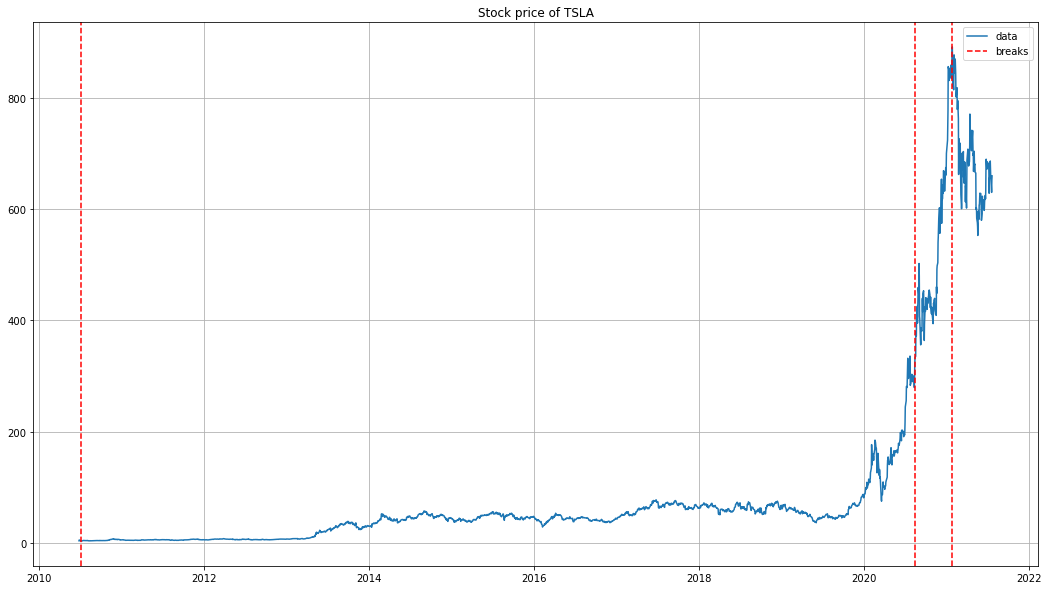

In [1176]:
#plt.figure(figsize=(18, 10))
plt.figure(figsize=(18, 10))
plt.plot(ts, label='data')
plt.title('Stock price of ' + stock_name)
print_legend = True
for i in breaks_jkp:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
    else:
        plt.axvline(i, color='red',linestyle='dashed')
plt.grid()
plt.legend()
plt.show()

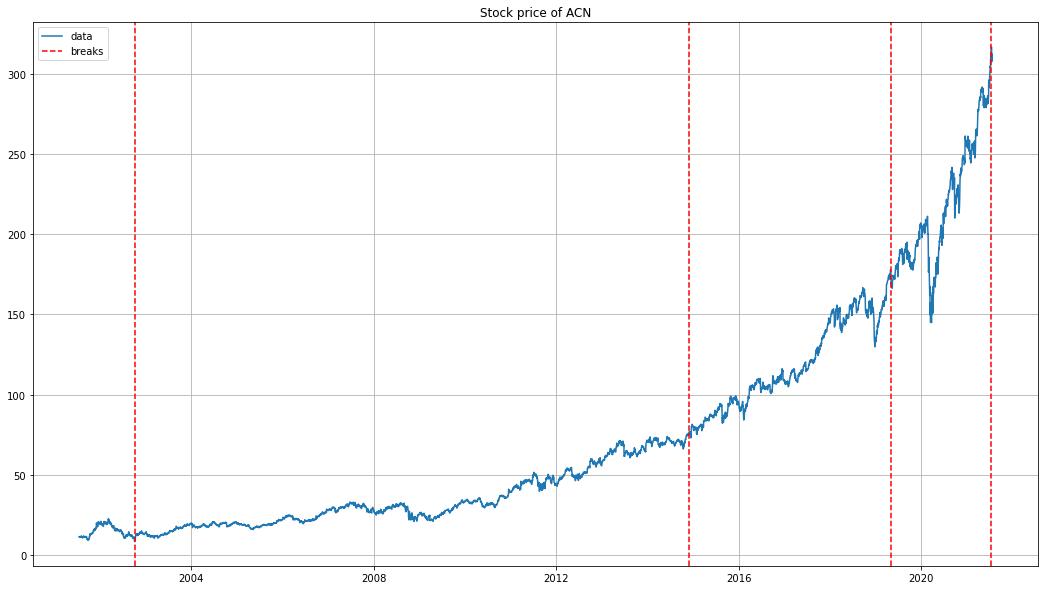

In [1152]:
#plt.figure(figsize=(18, 10))
plt.figure(figsize=(18, 10))
plt.plot(ts, label='data')
plt.title('Stock price of ' + stock_name)
print_legend = True
for i in breaks_jkp:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
    else:
        plt.axvline(i, color='red',linestyle='dashed')
plt.grid()
plt.legend()
plt.show()

In [1122]:
cur_index = []
cur_data = []

# segments = flatten_list(segments_pp)
# st.write('Number of identified segments: ', len(segments))
# identified segments
# st.write('Segments identified: ', segments_identified)

for i in range(len(breaks_jkp)):
        cur_index.append(list(breaks_jkp[i].date))
        cur_data.append(breaks[i])

In [1128]:
curindex = []

for i in cur_index:
    for date in i:
        curindex.append(date)

In [1137]:
curindex = []
for i in breaks_jkp:
    for date in i:
        curindex.append(date)

In [ ]:
import ruptures as rpt

model = rpt.Dynp(model="l1")
model.fit(y)

breaks = model.predict(n_bkps=n_breaks-1)

# NLG Breakpoint

In [1303]:
def fuzzy_slope(series):
    
    variables = []

    
    for i in series:   
        
        total_sum = {'quickly decreased' : [],
             'decreased' : [],
             'slowly decreased' : [],
             'remained stable' : [],
             'slowly increased' : [],
             'increased' : [],
             'quickly increased' : []}
            
        # change wording of membership functions
        total_sum['quickly decreased'].append(round(slope.quickly_decreasing(i), 2))
    
        total_sum['decreased'].append(round(slope.decreasing(i), 2))
        
        total_sum['slowly decreased'].append(round(slope.slowly_decreasing(i), 2))
        
        total_sum['remained stable'].append(round(slope.constant(i), 2))
        
        total_sum['slowly increased'].append(round(slope.slowly_increasing(i), 2))
        
        total_sum['increased'].append(round(slope.increasing(i), 2))
            
        total_sum['quickly increased'].append(round(slope.quickly_increasing(i), 2))
        
        # get category with highest value
        candidate = max(total_sum, key = lambda x: sum(total_sum.get(x)))
        truth_value = total_sum.get(max(total_sum, key = lambda x: sum(total_sum.get(x))))
        candidate_dict = total_sum
        
        variables.append((candidate, truth_value, candidate_dict))
 
            
    
    return variables

In [ ]:
series = calc_slope(segments)
fuzzy_slope(series)[0]

In [ ]:
def suffix(d):
    return 'th' if 11<=d<=13 else {1:'st',2:'nd',3:'rd'}.get(d%10, 'th')

def custom_strftime(t):
    
    format = '%B {S} %Y'
    string_date = t.strftime(format).replace('{S}', str(t.day) + suffix(t.day))
    
    return string_date

In [ ]:
def columns_to_tuples(column1, column2):
    tuple_series = list(zip(column1, round(column2, 2)))
    return tuple_series

In [1275]:
def date_extraction_of_segments(segments):
    
    dates = []
    
    for segment in segments:
        start_idx, _ , end_idx, _ = segment
        start_date = custom_strftime(list(df.index)[start_idx].date())
        end_date = custom_strftime(list(df.index)[end_idx].date())
        dates.append((start_date, end_date))
    
    return dates

In [1276]:
date_extraction_of_segments(segments)

[('June 29th 2010', 'July 8th 2010'),
 ('July 8th 2010', 'August 13th 2020'),
 ('August 13th 2020', 'January 26th 2021'),
 ('January 26th 2021', 'July 21st 2021')]

In [ ]:
def min_date(df):
    
    date = custom_strftime(df.index.min())

    return date

In [ ]:
def date_assignment(tuple_series):
    
    values_with_dates = []

    for i in range(len(tuple_series)):
        dates.append([tuple_series[i][0][0], tuple_series[i][-1][0]])
    
    return values_with_dates

In [1259]:
def price_change(segments):
    
    changes = []
    
    for segment in segments:
        _, start_value , _ , end_value = segment
        
        abs_change = round(end_value - start_value, 2)
        pct_change = round(((end_value - start_value) / start_value)*100, 2)
        changes.append((abs_change, pct_change))
        
    return changes

In [1288]:
price_changes = price_change(segments)
price_changes[0]

(-0.57, -15.05)

In [1277]:
dates = date_extraction_of_segments(segments)
dates

[('June 29th 2010', 'July 8th 2010'),
 ('July 8th 2010', 'August 13th 2020'),
 ('August 13th 2020', 'January 26th 2021'),
 ('January 26th 2021', 'July 21st 2021')]

In [1279]:
dates[0][1]

'July 8th 2010'

In [1296]:
def breakpoint_summary(segments):
    
    # get startdate and enddate in custom format of each segment
    dates = date_extraction_of_segments(segments)
    
    # get slope of each segment and calculate corresponding fuzzy variable
    slopes = calc_slope(segments)
    slope_variables = fuzzy_slope(slopes)
    
    # get price changes of each segment
    price_changes = price_change(segments)
    
    
    output = []
    
    for i in range(len(segments)):
        output.append('Between ' + dates[i][0] + ' and ' + dates[i][1] + ', ' + 'the closing price ' \
                     + str(slope_variables[i][0]) + ' with a change of ' + str(price_changes[i][0]) +'$' + ' (' + str(price_changes[i][1]) + '%).')
        
        
    return output

In [1298]:
slopes = calc_slope(segments)
slopes

[-5.45, 7.15, 78.77, -62.24]

In [1305]:
breakpoint_summary(segments)

['Between June 29th 2010 and July 8th 2010, the closing price remained stable with a change of -0.57$ (-15.05%).',
 'Between July 8th 2010 and August 13th 2020, the closing price remained stable with a change of 318.97$ (9881.41%).',
 'Between August 13th 2020 and January 26th 2021, the closing price quickly increased with a change of 569.18$ (176.65%).',
 'Between January 26th 2021 and July 21st 2021, the closing price decreased with a change of -231.77$ (-26.0%).']